<a href="https://colab.research.google.com/github/thebackbencher666/IMDB-movies-ML/blob/main/BooksDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('books.csv', on_bad_lines='skip')

#print the column names
print(df.columns)


# Select relevant columns
selected_columns = ['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count', 'language_code']
df_model = df[selected_columns].dropna()

# Encode language_code
le = LabelEncoder()
df_model['language_code'] = le.fit_transform(df_model['language_code'])

# Features and target
X = df_model.drop('average_rating', axis=1)
y = df_model['average_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')
MAE: 0.23
MSE: 0.12
R²: 0.09


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
df = pd.read_csv('books.csv', on_bad_lines='skip')

# Step 3: Quick check
print(df.info())
print(df.head())

print(df.columns)

# Step 4: Drop rows with missing values in relevant columns
df = df.dropna(subset=['average_rating'])  # Replace 'Rating' with your numeric target column

# Step 5: Encode categorical features
X = pd.get_dummies(df[['authors', 'publisher']], drop_first=True)  # Add more features if needed
y = df['average_rating']  # Replace with 'Price' or another numeric column if preferred




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None
   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

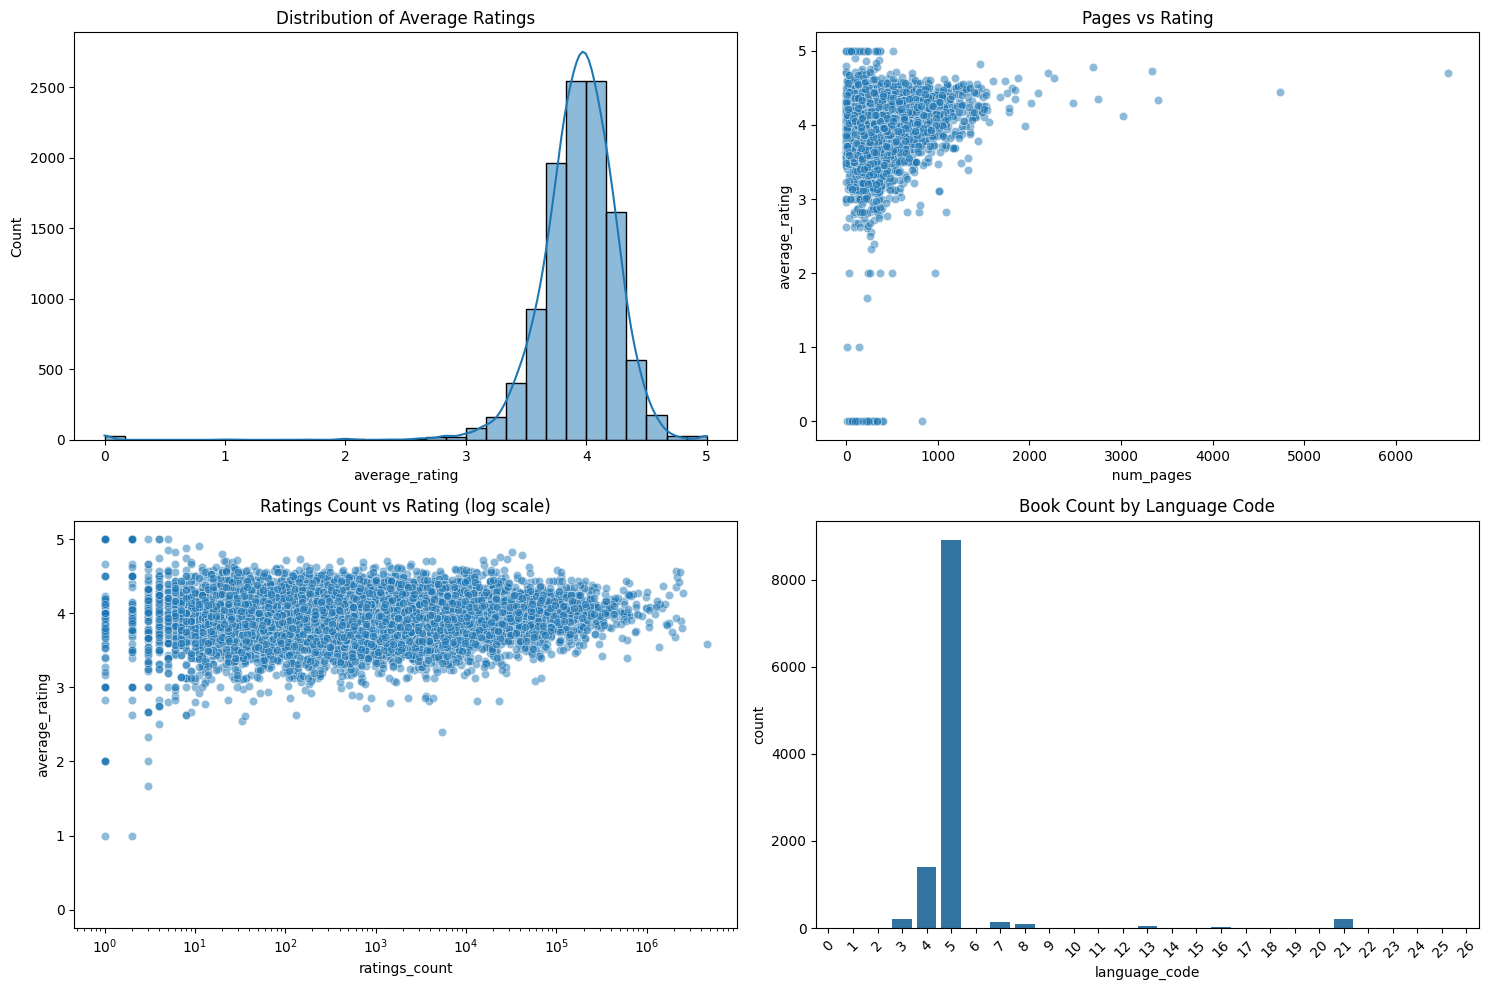

In [ ]:
# Plot distributions of numerical features
plt.figure(figsize=(15, 10))

# Histogram of average ratings
plt.subplot(2, 2, 1)
sns.histplot(df_model['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')

# Scatter plot: pages vs rating
plt.subplot(2, 2, 2)
sns.scatterplot(x='  num_pages', y='average_rating', data=df_model, alpha=0.5)
plt.title('Pages vs Rating')

# Ratings count vs rating
plt.subplot(2, 2, 3)
sns.scatterplot(x='ratings_count', y='average_rating', data=df_model, alpha=0.5)
plt.xscale('log')  # Using log scale because counts vary widely
plt.title('Ratings Count vs Rating (log scale)')

# Language code distribution
plt.subplot(2, 2, 4)
sns.countplot(x='language_code', data=df_model)
plt.title('Book Count by Language Code')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from font(s) DejaVu Sans.
  fig.canvas

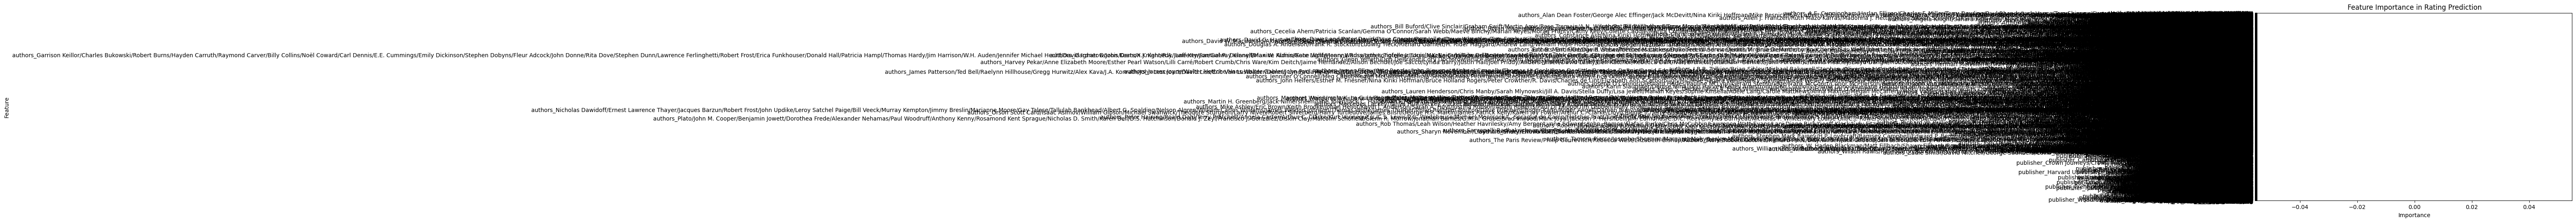

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model and X are defined
# Example: model = RandomForestClassifier().fit(X, y)
# X should be a pandas DataFrame

# Get feature importances
feature_importances = model.feature_importances_
features = X.columns

# Verify lengths match
assert len(features) == len(feature_importances), "Feature and importance lengths do not match"

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Rating Prediction')
plt.show()

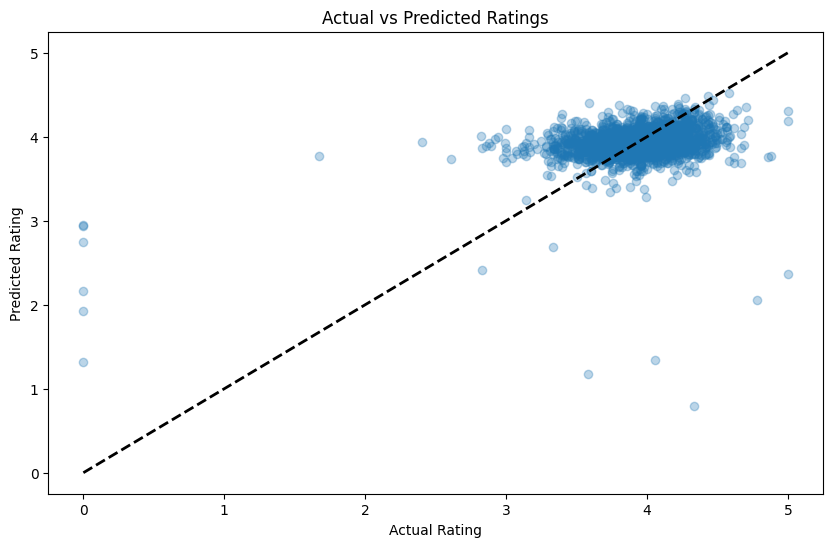

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings')
plt.show()

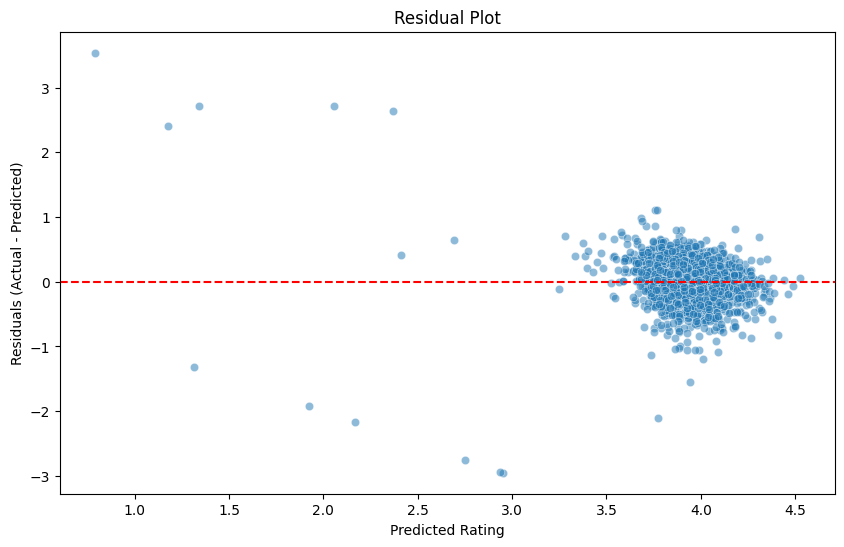

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

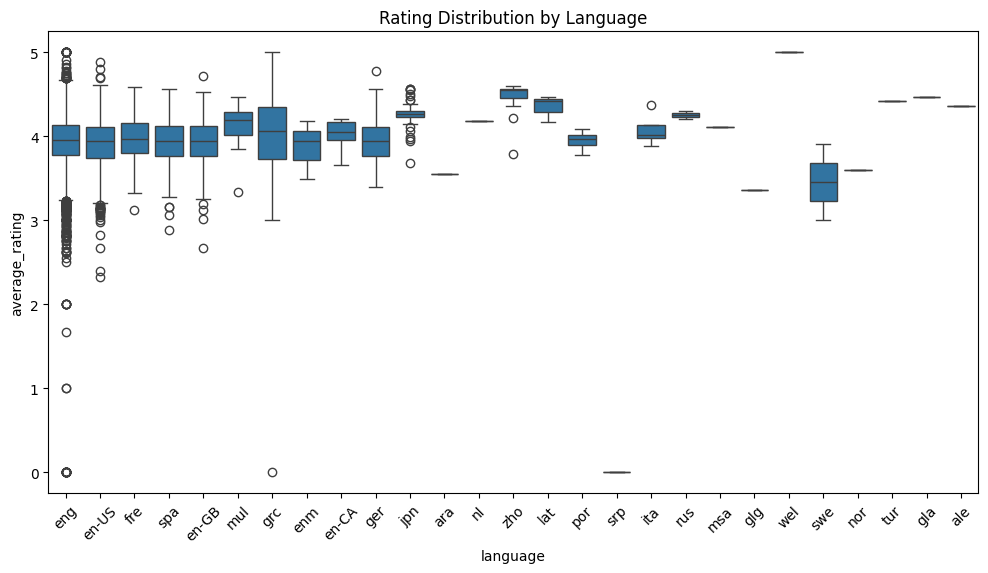

In [ ]:
# First decode language codes back to original values for readability
df_model['language'] = le.inverse_transform(df_model['language_code'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='average_rating', data=df_model)
plt.title('Rating Distribution by Language')
plt.xticks(rotation=45)
plt.show()